<h1><center>ETF Optimazation Portfolio Analysis</center></h1>

<p>This is a basic portfolio optimazation data project to help get a better idea of optimal portfolio weights, given a diverse, and broad market portfolio consisting of ETFs.</p>
<br>
<p>These ETFs were chosen to represent a diversified ETF only portfolio. This strategy uses Modern Portfolio Theory find an optimal portfolio weight. To read more on this subject, I recomend reading this <a href="https://www.investopedia.com/terms/m/modernportfoliotheory.asp">Investopedia article</a> and this <a href="https://en.wikipedia.org/wiki/Modern_portfolio_theory">Wikipedia article</a> on this subject.</p>
<br>
<p>The ETFs that were chosen to be used for the portfolio attempt to cover the broader market with minimal holdings.  In this analysis there will be one ETF for each of the following markets:
    <ul>
        <li>A large-cap U.S. ETF: <strong>SPY</strong></li>
        <li>A small-cap U.S. ETF: <strong>SLYG</strong></li>
        <li>An international developed-market ETF: <strong>VEA</strong></li>
        <li>An emerging-market ETF: <strong>VWO</strong></li>
        <li>a commodity index tracking fund: <strong>DBC</strong></li>
    </ul>
</p>
<br>
<p>
    For more detail on each of these ETFs, here is a breaf summary of what each of these index funds represents:
    <ul style="list-style: none">
        <li>
            <a href="https://finance.yahoo.com/quote/SPY/"><strong>SPY</strong></a>
            : SPDR S&P 500 ETF Trust
        </li>
        <li>
            <a href="https://finance.yahoo.com/quote/SLYG?p=SLYG&.tsrc=fin-srch"><strong>SLYG</strong></a>
            : SPDR S&P 600 Small Cap Growth ETF
        </li>
        <li>
            <a href="https://finance.yahoo.com/quote/VEA?p=VEA&.tsrc=fin-srch"><strong>VEA</strong></a>
            : Vanguard Developed Markets Index Fund
        </li>
        <li>
            <a href="https://finance.yahoo.com/quote/VWO?p=VWO&.tsrc=fin-srch"><strong>VWO</strong></a>
            : Vanguard Emerging Markets Stock Index Fund
        </li>
        <li>
            <a href="https://finance.yahoo.com/quote/DBC?p=DBC&.tsrc=fin-srch"><strong>DBC</strong></a>
            : Invesco DB Commodity Index Tracking Fund
        </li>
    </ul>
</p>
<p></p>

<h3>Lets get started</h3>
<p>First we start off with our general imports for data analysis and visualizations.</p>

In [158]:
# General imports

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy.linalg import multi_dot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pandas_datareader.data as web
from datetime import datetime
from __future__ import division

<p>We make our list of ETFs and set the <code>start</code> and <code>end</code> dates, as well as the number of <code>years</code> of data we would like to base this portfolio off of.</p>
<p>For this project, I am using <code>datetime.now()</code> to get the current market price for each asset.  Therefore, <u>everytime this code is ran, there will be a different output</u>.</p>
<p>For this project, I am using 1 <code>years</code> of data.</p>

In [159]:
# List of ETFs

etfs = ['SPY', 'SLYG', 'VEA', 'VWO', 'DBC'] #FTBFX or DBC

# Start and end dates, as well as how many years of data to look at

end = datetime.now() 
years = 1
start = datetime(end.year - years, end.month, end.day)

<p>Next we loop through the list using <code>globals()</code> to put the data into 5 Pandas DataFrames, one DataFrame for each ETF.  Also note that we need to find the current <code>risk_free_rate</code> to calculate the Sharpe Ratio.</p>
<p>For this project I am setting the <code>principal</code>, or the initial portfolio value, at $5000.</p>

In [160]:
# Loop through ETF list

for etf in etfs:
    globals()[etf] = web.DataReader(name=etf, data_source='yahoo', start=start, end=end)
    
r_f = web.DataReader(name="^TNX", data_source='yahoo', start=start, end=end)

# Find latest risk free rate

risk_free_rate = r_f['Adj Close'].iloc[-1] / 100

# Set principal
principal = 5000

print("The 10 year treasury yield, otherwise known as the risk free rate, is {:.3f}%".format(risk_free_rate * 100))
print("The account principal is ${}".format(principal))

The 10 year treasury yield, otherwise known as the risk free rate, is 3.439%
The account principal is 5000


<p>Now it's time to visualize what the price change has looked like over $n$ <code>years</code>.</p>

<AxesSubplot:xlabel='Date'>

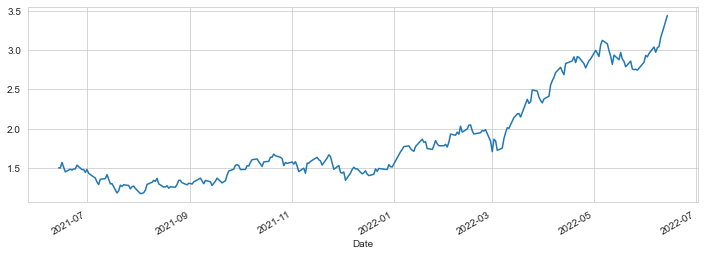

In [161]:
# Plot the 10 year treasury yield

r_f['Adj Close'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

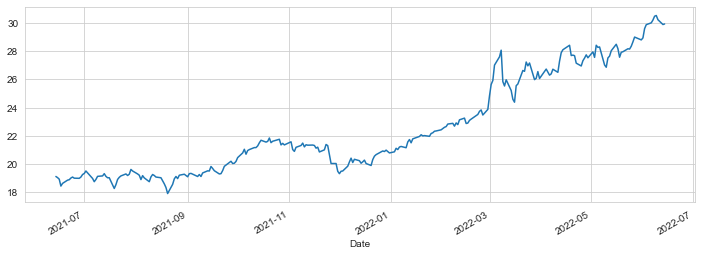

In [162]:
DBC['Adj Close'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

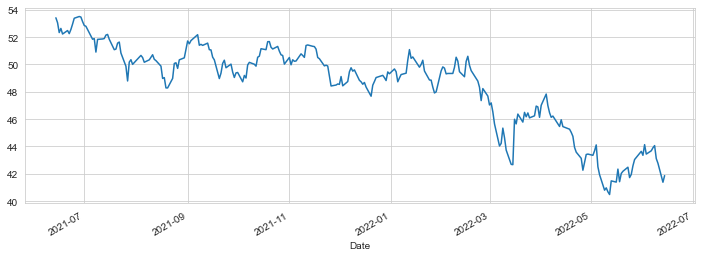

In [163]:
VWO['Adj Close'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

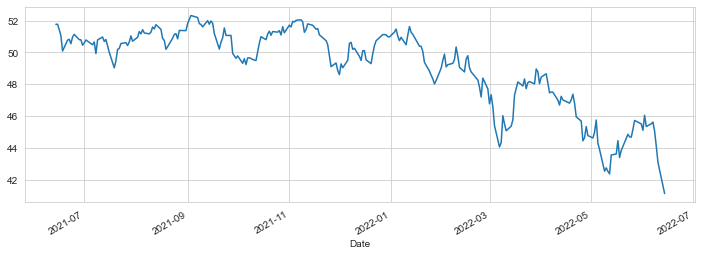

In [164]:
VEA['Adj Close'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

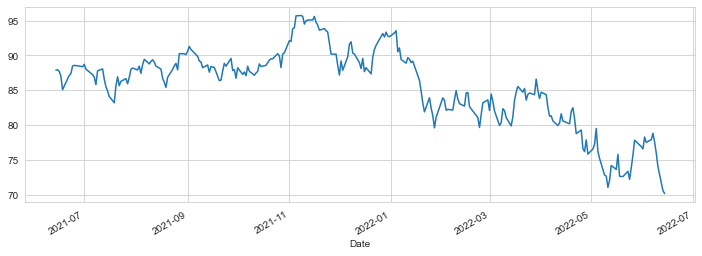

In [165]:
SLYG['Adj Close'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

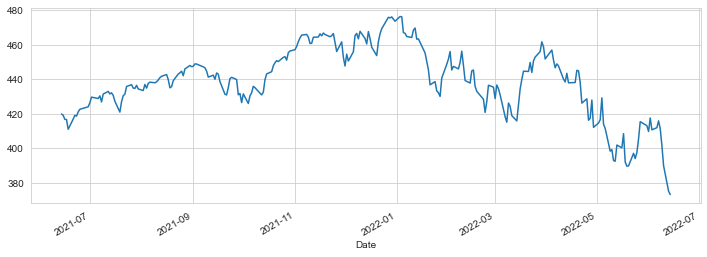

In [166]:
SPY['Adj Close'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

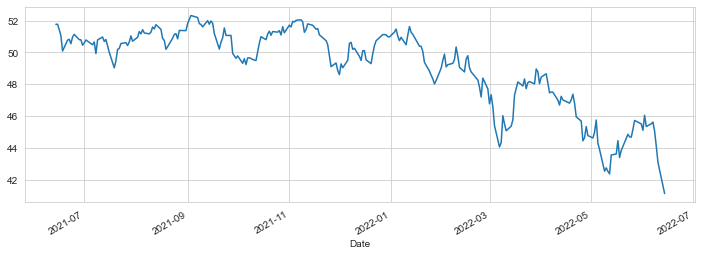

In [167]:
VEA['Adj Close'].plot(figsize=(12,4))

<p>To observe the returns of the portfolio, we need to make a DataFrame from the <code style="color: rgb(186,34,32)">Adj Close</code> column of each ETF.</p>

In [168]:
# Make a new dataframe with just the adjusted close prices

adj_close_df = web.DataReader(etfs,'yahoo',start,end)['Adj Close']

# View recent closing prices

adj_close_df.tail()

Symbols,SPY,SLYG,VEA,VWO,DBC
Date,,,,,
2022-06-08,411.220001,77.589996,45.049999,44.060001,30.480000
2022-06-09,401.440002,76.019997,44.110001,43.110001,30.530001
2022-06-10,389.799988,74.080002,43.090000,42.770000,30.230000
2022-06-13,375.000000,70.650002,41.619999,41.380001,29.889999
2022-06-14,372.910004,70.239998,41.130001,41.860001,29.930000


<p>Now lets look at all the price changes over $n$ <code>years</code> for all the ETFs.</p>

<AxesSubplot:xlabel='Date'>

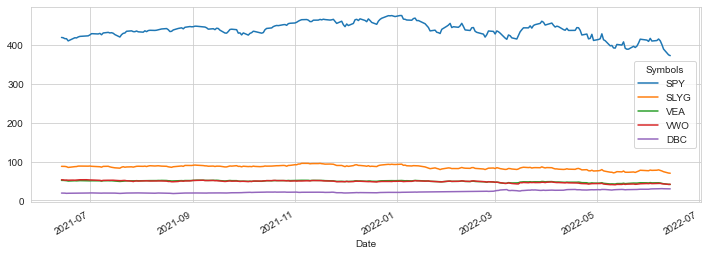

In [169]:
# Plot all adjusted close prices on one chart

adj_close_df.plot(figsize=(12,4))

<p>From the <code style="color: rgb(186,34,32)">Adj Close</code> columns, we can now calculate the <code>pct_change()</code> of the ETF prices.</p>

In [170]:
# Look at the percent change of the returns

returns_df = adj_close_df.pct_change()

returns_df

Symbols,SPY,SLYG,VEA,VWO,DBC
Date,,,,,
2021-06-14,NaN,NaN,NaN,NaN,NaN
2021-06-15,-0.001834,0.000452,0.000188,-0.006742,-0.004186
2021-06-16,-0.005583,-0.002600,-0.006567,-0.013575,-0.005780
2021-06-17,-0.000332,-0.007933,-0.007365,0.005765,-0.025899
2021-06-18,-0.013490,-0.022161,-0.019026,-0.007766,0.010309
...,...,...,...,...,...
2022-06-08,-0.010872,-0.016229,-0.012495,0.003645,0.008937
2022-06-09,-0.023783,-0.020235,-0.020866,-0.021562,0.001640
2022-06-10,-0.028996,-0.025520,-0.023124,-0.007887,-0.009826


<p>Lets see what the total return is for each ETF was over the last $n$ <code>years</code>.</p>

In [171]:
returns_df.sum()

Symbols
SPY    -0.100003
SLYG   -0.196771
VEA    -0.214862
VWO    -0.223450
DBC     0.477166
dtype: float64

<p>Since I was trying to pick a diversified stock portfolio, it is important that we try to pick stocks that have a low corrilation coeficient.</p>
<p>Unfortunately these stocks seem to have a fairly high correlation, although they are well diversified choices.</p>

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

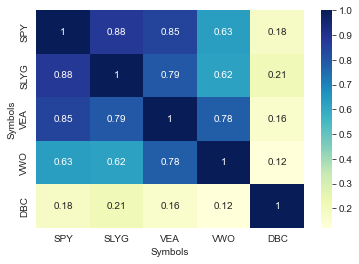

In [172]:
# See what the correlation of the returns are

sns.heatmap(returns_df.corr(),annot=True, cmap='YlGnBu')

<p>Calculating the percent change is interesting, but its not exactly accurate for what we want to do. 
Since we are dealing with growth of a portfolio over time it is more concise to use the log return. 
The log return will give us a better picture of the compound, and symetric growth of our portfolio over time.</p>
<p>In this step, we will create a new DataFrame, <code>log_returns_df</code> to manage these values.</p>

In [173]:
# Now, look at the log returns

log_returns_df = np.log(adj_close_df / adj_close_df.shift(1))

log_returns_df

Symbols,SPY,SLYG,VEA,VWO,DBC
Date,,,,,
2021-06-14,NaN,NaN,NaN,NaN,NaN
2021-06-15,-0.001836,0.000452,0.000188,-0.006765,-0.004195
2021-06-16,-0.005599,-0.002603,-0.006588,-0.013668,-0.005797
2021-06-17,-0.000332,-0.007964,-0.007393,0.005749,-0.026240
2021-06-18,-0.013582,-0.022411,-0.019209,-0.007797,0.010257
...,...,...,...,...,...
2022-06-08,-0.010932,-0.016362,-0.012573,0.003638,0.008898
2022-06-09,-0.024070,-0.020442,-0.021086,-0.021797,0.001639
2022-06-10,-0.029424,-0.025851,-0.023396,-0.007918,-0.009875


<p>Now that we have a more consistent return DataFrame for our portfolio, we will want to calculate the <code>mean_returns</code> of our <code>log_returns_df</code>, and annualize them.</p>

In [174]:
# Let's look at the annualized mean return

mean_returns = log_returns_df.mean() * 252

mean_returns

Symbols
SPY    -0.117822
SLYG   -0.223528
VEA    -0.229105
VWO    -0.242691
DBC     0.446876
dtype: float64

<p>The following code below is to demonstate the random weights to be destributed to each asset. All weights need to sum to 1.</p>

In [175]:
# Sample random weight genorator to find Markowitz Bullet

sample_weights = np.random.random(len(etfs))
sample_weights = sample_weights/np.sum(sample_weights)
print("Randomized weights :", sample_weights)
print("Total of weights :", np.sum(sample_weights))

Randomized weights : [0.07571537 0.21073501 0.00884009 0.45791568 0.24679386]
Total of weights : 1.0000000000000002


<h2><center>Creating The Markowits Bullet</center></h2>

<p>In this part of the notebook, we will create empty lists for the <code>portfolio_returns</code>, <code>portfolio_volatility</code>, <code>portfolio_sharpe_ratio</code>, and the <code>portfolio weights</code> to make the Markowitz Bullet.</p>
<p>By itterating over a <code>range</code> of $n$ differnet cases, we can build $n$ different theoretical portfolios.  In theory, we could take the past performance of these portfolios, with $n$ different weights, and choose the portfolio with the best reward/risk ratio.</p>
<p>We will find $n$ random weights using the <code>NumPy.random()</code> function.  Then we will append these randomly generaded weights to the lists mentioned above, then finally create a <code>NumPy.array()</code> with these lists.</p>
<p>For this analysis, I have chosen 1000 itterations.</p>
<p>We also need to make sure to annualize everything that we compute on a daily basis from the <code>log_returns_df</code>.  By annualizing <code>log_returns_df.mean()) * 252</code>, and <code>log_returns_df.cov() * 252</code> we will get an average return and an average covariance coefficient on each day that we compute the data.  When we multiply these values by <code>years</code>, we can adjust this code to whatever time frame that we would like.</p>
<p><i>Note that there are 252 trading days in a year.</i></p>

In [176]:
# Create empty lists for all the different portfolios, Sharpe Ratios, 
# portfolio weights, returns and volatility in Markowitz Bullit

portfolio_returns = []
portfolio_volatility = []
portfolio_sharpe_ratio = []
portfolio_weights = []

# Fill lists with n different portfolios

for i in range(10000):
    portfolio_weight = np.random.random(len(etfs))
    portfolio_weight = portfolio_weight / np.sum(portfolio_weight)
    
    returns = (np.sum(portfolio_weight * log_returns_df.mean()) * 252) * years
    portfolio_returns.append(returns)
    
    volatility = np.sqrt(multi_dot([portfolio_weight.T, (log_returns_df.cov() * 252) * years, portfolio_weight]))
    portfolio_volatility.append(volatility)
    
    sharpe_ratio = (returns - risk_free_rate) / volatility
    portfolio_sharpe_ratio.append(sharpe_ratio)
    
    portfolio_weights.append(portfolio_weight)
    
# Put portfolios, Sharpe Ratio, return, volatility and weights into NumPy arrays

portfolio_returns = np.array(portfolio_returns)
portfolio_volatility = np.array(portfolio_volatility)
portfolio_sharpe_ratio = np.array(portfolio_sharpe_ratio)
portfolio_weights = np.array(portfolio_weights)

# Look at arrays that were just created

portfolio_returns, portfolio_volatility, portfolio_sharpe_ratio, portfolio_weights

(array([-0.05642149, -0.18840718,  0.04008792, ...,  0.00034424,
        -0.0019392 ,  0.06003556]),
 array([0.16428962, 0.17376245, 0.1550248 , ..., 0.15698649, 0.15544908,
        0.15999603]),
 array([-0.55275243, -1.28219409,  0.03675491, ..., -0.21687063,
        -0.2337048 ,  0.16028873]),
 array([[0.21339214, 0.26846706, 0.18576285, 0.11201478, 0.22036318],
        [0.17397186, 0.19380311, 0.27994886, 0.31595918, 0.03631699],
        [0.13592467, 0.07037206, 0.06016733, 0.35120898, 0.38232697],
        ...,
        [0.20748232, 0.16286721, 0.26817508, 0.05641029, 0.3050651 ],
        [0.05309083, 0.15120346, 0.17338535, 0.29041756, 0.3319028 ],
        [0.02077758, 0.10460701, 0.02280781, 0.41991711, 0.43189048]]))

<p>In this next section, I am putting the <code>portfolio_returns</code> and <code>portfolio_volatility</code> arrays into a single Pandas DataFrame for plotting purposes.</p>

In [177]:
# Add return and volatility into DataFrame

portfolios = pd.DataFrame({"Return": portfolio_returns, "Volatility": portfolio_volatility})

portfolios

,Return,Volatility
0,-0.056421,0.164290
1,-0.188407,0.173762
2,0.040088,0.155025
3,-0.026914,0.151609
4,0.034008,0.152166
...,...,...
9995,-0.160418,0.171297
9996,-0.188856,0.187386
9997,0.000344,0.156986
9998,-0.001939,0.155449


<p>In this next section, we need to the maximum Sharpe Ratio out of our array <code>portfolio_sharpe_ratio</code>. We will add this to a new DataFrame called <code>l_s_portfolio</code>.</p>

In [178]:
# Find max and min Sharpe Ratios

largest_sharpe_ratio = np.argmax(portfolio_sharpe_ratio)
# smallest_sharpe_ratio = np.argmin(portfolio_sharpe_ratio)

# Make new DataFrames with portfolios with the highest and lowest Sharpe Ratios

l_s_portfolio = pd.DataFrame({"Volatility":portfolio_volatility[largest_sharpe_ratio], 
                              "Return":portfolio_returns[largest_sharpe_ratio]}, index=[0])

# This DataFrame/Portfolio is not needed, but I have left it in case I will need it later.
# s_s_portfolio = pd.DataFrame({"Volatility":portfolio_volatility[smallest_sharpe_ratio], 
#                              "Return":portfolio_returns[smallest_sharpe_ratio]}, index=[0])

<p>Now that <code>portfolios</code> and <code>l_s_portfolio</code> are estableshed, it is time to plot them.</p>
<p>There will also be a plot for the minimum risk portfolio, and a line to indicate the current <code>risk_free_rate</code>.</p>

<Figure size 432x288 with 0 Axes>

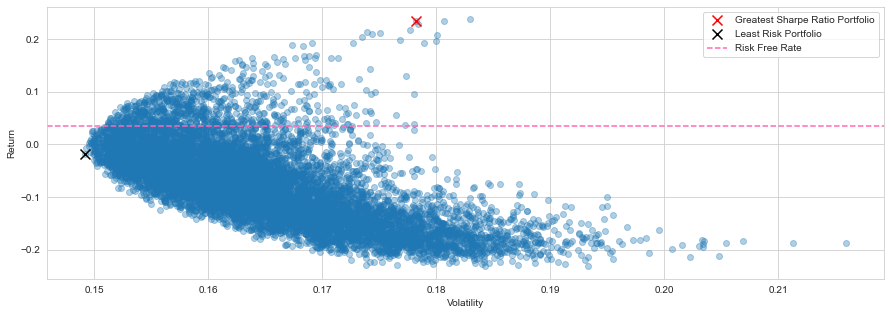

In [179]:
# ---- Plot Markowitz Bullet ---- #

fig=plt.figure()
plt.figure(figsize=(15,5))

# Plot all portfolios

plt.scatter(portfolios['Volatility'],portfolios['Return'], alpha=0.35)

# Plot portfolio with the greatest Sharpe Ratio

plt.scatter(l_s_portfolio['Volatility'],l_s_portfolio['Return'], color='r',
            marker='x', s=100, label='Greatest Sharpe Ratio Portfolio')

# Plot portfolio with the most minimal risk to return

plt.scatter(min(portfolio_volatility),
            portfolio_returns[np.where(portfolio_volatility == min(portfolio_volatility))], 
            color='k',marker='x', s=100, label="Least Risk Portfolio")

# Plot the risk free rate with a horizontal line 

plt.axhline(y=risk_free_rate, color='hotpink', linestyle='--', label='Risk Free Rate')

# The vertical line below is not needed, but can show a greater perspective 
# to where the y axis is. This may help if later if we choose to plot a 
# capital allocation line (CAL)
# plt.axvline(x=0, color='r') # This shows the line x = 0 for perspective

# Plot axis, and legend

plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()
plt.show()

<p>After we have visualized the Markowitz Bullet, the optimal Sharpe Ratio, and the minimum risk portfolio, let's have a look at what the <code>portfolio_weights</code> of these portfolios are. After that we will also print the <code>portfolio_volatility</code> and <code>portfolio_return</code> for each to see how profitable or unprofitable they are.</p>

In [180]:
# Print portfolios with max and min Sharpe Ratios, as well as the portfolio weights,
# and the return and volatility of each portfolio

# First, the portfolio with max Sharpe Ratio, the assiociated weights, volatility and return

print("FOR GREATEST SHARPE RATIO PORTFOLIO:")
print("---------------------------------------")
i = 0
while i < len(etfs):
    print("ETF weight for: {}: {:.2f}% portfolio allocation".format(etfs[i], portfolio_weights[largest_sharpe_ratio][i] * 100))
    i+=1

print("Annualized Volatility: {:.2f}%".format(portfolio_volatility[largest_sharpe_ratio] * 100))

print("Annualized Return: {:.2f}%".format(portfolio_returns[largest_sharpe_ratio] * 100))

print('\n')
print("##########################################################################")
print('\n')

# Then, Portfolio with min Sharpe Ratio, the associated portfolio weights,
# volatility and return

print("FOR LOWEST VOLATILITY PORTFOLIO WITH MAXIMUM RETURN:")
print("---------------------------------------")
i = 0
while i < len(etfs):
    print("ETF weight for: {}: {:.2f}% portfolio allocation".format(etfs[i], 
                                                                portfolio_weights[np.where(portfolio_volatility == 
                                                                min(portfolio_volatility))][0][i] * 100))
    i+=1

print("Annualized Volatility: {:.2f}%".format(min(portfolio_volatility) * 100))

print("Annualized Return: {:.2f}%".format(portfolio_returns[np.where(portfolio_volatility == min(portfolio_volatility))][0] * 100))

FOR GREATEST SHARPE RATIO PORTFOLIO:
---------------------------------------
ETF weight for: SPY: 29.16% portfolio allocation
ETF weight for: SLYG: 5.76% portfolio allocation
ETF weight for: VEA: 0.45% portfolio allocation
ETF weight for: VWO: 0.93% portfolio allocation
ETF weight for: DBC: 63.70% portfolio allocation
Annualized Volatility: 17.82%
Annualized Return: 23.41%


##########################################################################


FOR LOWEST VOLATILITY PORTFOLIO WITH MAXIMUM RETURN:
---------------------------------------
ETF weight for: SPY: 4.39% portfolio allocation
ETF weight for: SLYG: 0.25% portfolio allocation
ETF weight for: VEA: 44.39% portfolio allocation
ETF weight for: VWO: 20.18% portfolio allocation
ETF weight for: DBC: 30.78% portfolio allocation
Annualized Volatility: 14.92%
Annualized Return: -1.89%


<p>It might be interesting to have a visual representation of the weights of each maximum Sharpe Ratio and minimum risk portfolios.  For this opporation, I will use a pie chart to make the visualizations very obvious.</p>

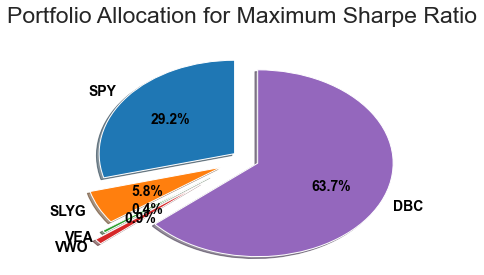

In [181]:
# Visualize weighted portfolio for the max Sharpe Ratio

labels = etfs
max_sr_weights = portfolio_weights[largest_sharpe_ratio]
explode = (0.1, 0.2, 0.3, 0.4, 0.1)  
# explode = (.5,0.5,0.5,1,0)  
fig1, ax1 = plt.subplots()
ax1.pie(max_sr_weights, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'color': 'black', "size": "14", "weight": "bold"})
plt.title("Portfolio Allocation for Maximum Sharpe Ratio", fontsize=23, y=1.1)
ax1.axis('auto')  
plt.show()

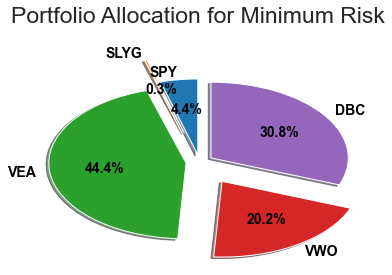

In [182]:
# Visualize weighted portfolio for the min Sharpe Ratio

min_vol_weights = portfolio_weights[np.where(portfolio_volatility == min(portfolio_volatility))][0]
explode = (0.1,.4,0.1,0.3,0.1)  

fig2, ax2 = plt.subplots()
ax2.pie(min_vol_weights, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'color': 'black', "size": "14", "weight": "bold"})
plt.title("Portfolio Allocation for Minimum Risk", fontsize=23, y=1.1)
ax2.axis('auto')  
plt.show()

<h3>Unpacking  analyzation and looking at final portfolio perfomance</h3>
<p>For this final analysis, we will look at the final allocation of the <code>principal</code> of each asset in our <code>final_df</code> DataFrame, and find the todal return for each asset with the allocated <code>principal</code>.</p>

In [183]:
# Calculate distribution of principal

weighted_sr = principal * max_sr_weights

weighted_sr

array([1458.17964809,  288.03437589,   22.33432406,   46.58949701,
       3184.86215495])

In [184]:
# Show return of each asset  

log_returns_df.sum() 

Symbols
SPY    -0.118290
SLYG   -0.224415
VEA    -0.230015
VWO    -0.243654
DBC     0.448650
dtype: float64

In [185]:
# Make final DataFrame with all the returns from each asset

final_df = log_returns_df.add(1).fillna(1).cumprod() * weighted_sr 
final_df

Symbols,SPY,SLYG,VEA,VWO,DBC
Date,,,,,
2021-06-14,1458.179648,288.034376,22.334324,46.589497,3184.862155
2021-06-15,1455.502647,288.164656,22.338512,46.274328,3171.501426
2021-06-16,1447.353096,287.414496,22.191341,45.641831,3153.115758
2021-06-17,1446.873182,285.125412,22.027287,45.904215,3070.378696
2021-06-18,1427.221374,278.735554,21.604162,45.546315,3101.870123
...,...,...,...,...,...
2022-06-08,1404.638776,247.679317,19.165674,37.703132,4935.862922
2022-06-09,1370.828748,242.616235,18.761538,36.881303,4943.953361
2022-06-10,1330.493026,236.344411,18.322601,36.589274,4895.131646


<p>Finaly we will look at the end results after $n$ <code>years</code> with this optimal portfolio allocation.</p>

In [188]:
# Print final results

print("Return after {} year(s), with ${} principal, would be ${:.2f}.".format(years,principal,final_df.iloc[-1].sum() - principal))

print("This would be a {:.2f}% return on your initial investment.".format(((final_df.iloc[-1].sum() - principal) / principal) * 100))

Return after 1 years, with $5000 principal, would be $1395.18.
This would be a 27.90% return on your initial investment.


<h2><center>Conclusion</center></h2>

<p>I last computed this project on 2022/6/14 with one years worth of data. At this moment, we are in some interesting economic times. Just the day before I computed this project the U.S. market was finally declared a bear market. Recently, stocks have been declining and commodities have been rising. Also the current interest rates have been rising rapidly. The current "risk free interest rate" (i.e. the 10 Year Treasury Note) is at <samp>34.4%</samp>.</p>

<p>The reason this is important is because the risk free interest rate plays a role in computing the Sharpe Ratio and choosing the optimal portfolio weights.  At this moment, the minimal risk portfolio has a lower return than the risk free option, that is, a lower return than if you put of the principal into Treasury bonds.</p>

<p>
The weights, volatility and return computed for the <b>minimum risk portfolio</b> are: 
    <samp>
        SPY: 4.39% portfolio allocation
        SLYG: 0.25% portfolio allocation
        VEA: 44.39% portfolio allocation
        VWO: 20.18% portfolio allocation
        DBC: 30.78% portfolio allocation
        Annualized Volatility: 14.92%
        Annualized Return: -1.89%
    </samp>
</p>
<p>
As for the <b>maximum Sharpe Ratio portfolio</b>, things are looking better, however, they come with a greater risk. For the portfolio with the maximum Sharpe Ratio the weights, volatility and return were computed to be:
    <samp>
        SPY: 29.16% portfolio allocation
        SLYG: 5.76% portfolio allocation
        VEA: 0.45% portfolio allocation
        VWO: 0.93% portfolio allocation
        DBC: 63.70% portfolio allocation
        Annualized Volatility: 17.82%
        Annualized Return: 23.41%
    </samp>
</p>
<p>Since it is not feasible to pull all the principal into the minimum volatility portfolio, given the past year of data, I chose to analyse the maximum Sharpe Ratio portfolio.  Given the past year's price changes, we would see:
    <samp>
        Return after 1 year(s), with \$5000 principal, would be \$1395.18.
        This would be a 27.90% return on your initial investment.
    </samp>
</p>
<i>Note that the final return is not annualized, Which is why there is a difference in the returns.<i/>